In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis, probplot



In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [5]:
df.sample(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2144922,2487456,B01MYAQVKM,Solid Silver Handmade Adjustable 5mm Toe Ring....,4.0,11,9.00,False,0,Handmade Jewellery
346221,370503,B0CDLJQR3C,"Portable Indoor Exercise Bike,Home Fitness Equ...",0.0,0,919.98,False,0,Sports & Outdoors
672539,722163,B09ZHS3N89,Rega Record Store Day Turntable 2022 – Planar ...,5.0,6,299.00,False,0,Home Audio Record Players
758129,818283,B0BL2H7QLY,Uinfhyknd Ebike Display Cable 5 Pin for BBS01/...,0.0,0,6.89,False,0,Sports & Outdoors
1049551,1159218,B0CB38385R,Ctronics 2.5K 4MP Dual Lens CCTV Security Came...,0.0,0,99.99,False,0,Surveillance Cameras


In [ ]:
df.info()

#### Challenge 1

In [7]:
frequency_table = df['category'].value_counts()

In [8]:
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [9]:
top_categories = frequency_table.head(5)
top_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

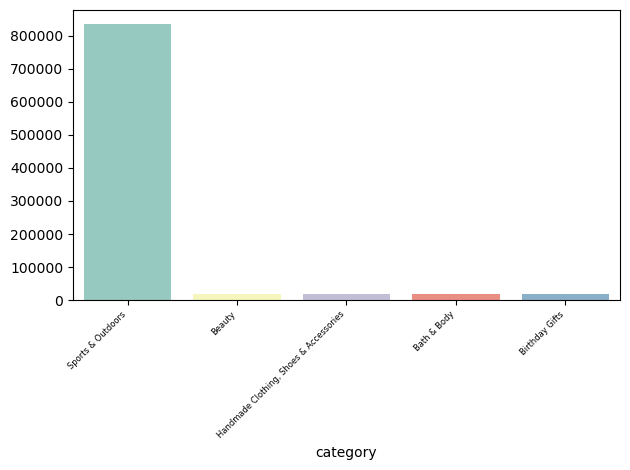

In [10]:
sns.barplot(x=top_categories.index, y=top_categories.values, palette="Set3");
plt.xticks(fontsize=6, rotation=45, ha='right')  # Adjust ha for horizontal alignment

# Display the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

In [11]:
proportion_table = df['category'].value_counts(normalize=True)

In [12]:
top_categories_proportion = proportion_table.head(5)
top_categories_proportion

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
Name: proportion, dtype: float64

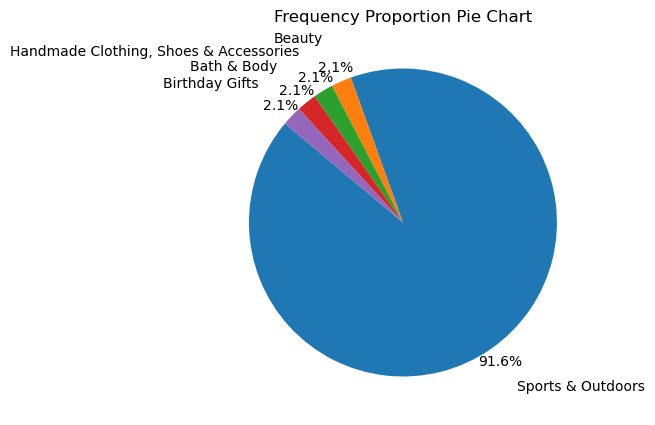

In [23]:
plt.figure(figsize=(5, 5))  # Optional: Adjust figure size
plt.pie(top_categories_proportion, labels=top_categories_proportion.index, autopct='%1.1f%%', startangle=140,  labeldistance=1.3, pctdistance=1.1)

# Display the plot
plt.title('Frequency Proportion Pie Chart')
plt.show()

#### Challenge 2

In [24]:
price_summary = df['price'].describe()

In [26]:
# Convert to more understandable numbers
formatted_summary = price_summary.apply(lambda x: f'{x:,.2f}')
formatted_summary

count    2,443,651.00
mean            89.24
std            345.61
min              0.00
25%              9.99
50%             19.09
75%             45.99
max        100,000.00
Name: price, dtype: object

In [29]:
df['price'].median()

19.09

In [28]:
df['price'].mean()

89.24380943923663

In [27]:
df['price'].mode()

0    9.99
Name: price, dtype: float64

The average price is 89 and the mode is 9.99, which means that the mode is way lower than the average price. 

In [35]:
# Calculate variance
df['price'].var()


119445.48532256528

In [36]:
df['price'].std()

345.60886175352226

In [38]:
# Calculate range
price_range = df['price'].max() - df['price'].min()
price_range

100000.0

In [40]:
# Calculate interquartile range (IQR)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
IQR

36.0

In [41]:
#Coefficient of Variation:
cv = df['price'].std() / df['price'].mean()
cv

3.8726368128518396

In prices a standard deviation of $345 might be considered low or moderate considering the range is 10 000. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


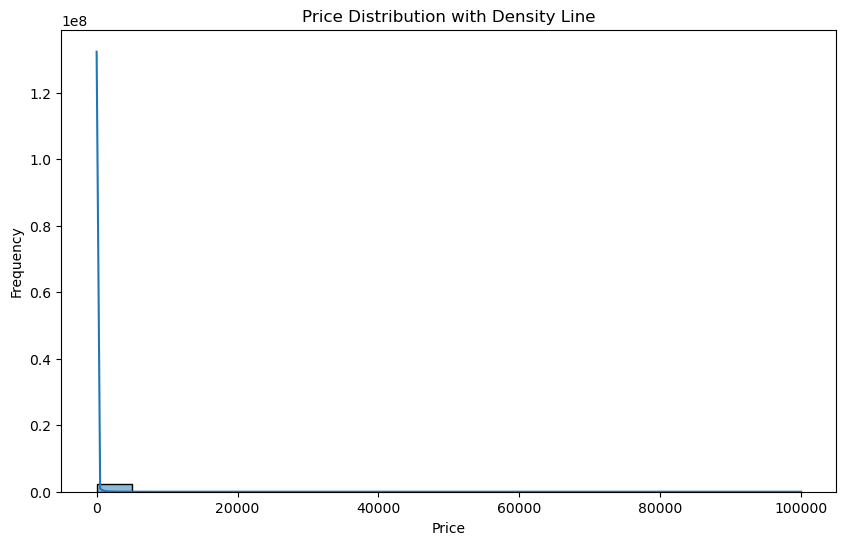

In [43]:
# Create a histogram with a density plot using seaborn
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sns.histplot(df['price'], bins=20, kde=True)

# Add titles and labels
plt.title('Price Distribution with Density Line')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Display the plot
plt.show()

The large range and outliers with very high max values make it very hard to understand the data from the graph

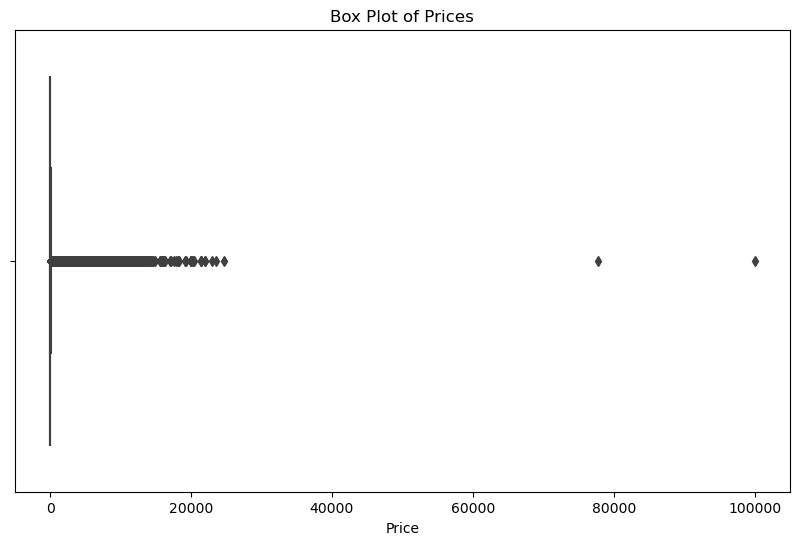

In [44]:
# Create a boxplot for the 'price' column
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sns.boxplot(x=df['price'])

# Add titles and labels
plt.title('Box Plot of Prices')
plt.xlabel('Price')

# Display the plot
plt.show()

### Challenge 3

In [47]:
df['stars'].mean()

2.152836472966065

In [48]:
df['stars'].median()

0.0

In [49]:
df['stars'].mode()

0    0.0
Name: stars, dtype: float64

In [51]:
df['stars'].value_counts()

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

Large majority of customers rate priduct with 0.0, in fact it is such a large proportion that even though the average rating is 2.15, the median of the ratings is still 0.00. 

In [52]:
df['stars'].var()

4.81743402976196

In [53]:
df['stars'].std()

2.1948653785054697

In [55]:
stars_range = df['stars'].max() - df['stars'].min()
stars_range

5.0

Since standard deviation is almost half of the range it indicates relatively high variation

In [58]:
skewness = skew(df['stars'])
skewness
#data is positively skewed - quite symmetric distribution with a long tail on the right side

0.08120730776283354

In [60]:
kurtosis_value = kurtosis(df['stars'])
kurtosis_value
#data is platykurtic - less peaked than a normal distribution with fewer extreme values

-1.926004642549839

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


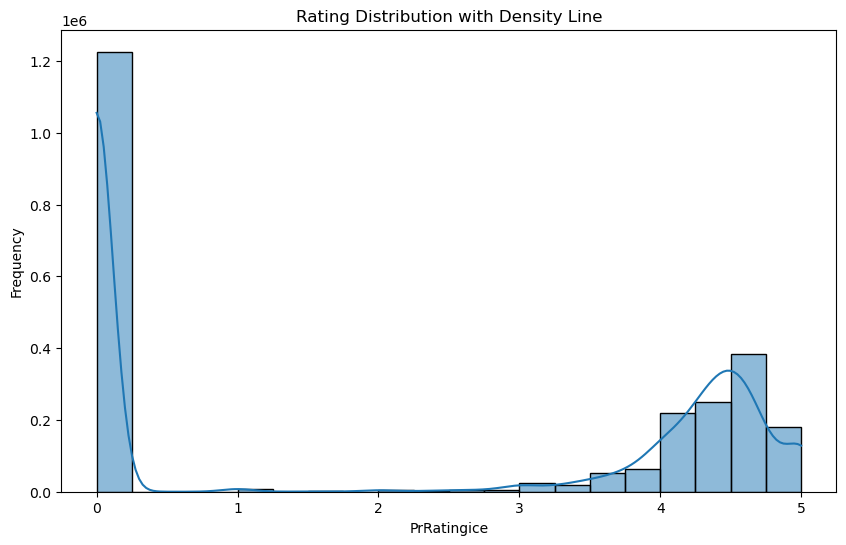

In [61]:
# Create a histogram with a density plot using seaborn
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sns.histplot(df['stars'], bins=20, kde=True)

# Add titles and labels
plt.title('Rating Distribution with Density Line')
plt.xlabel('PrRatingice')
plt.ylabel('Frequency')

# Display the plot
plt.show()